# Import the packages, algorithms and metrics

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Load in data and create dataframe

In [2]:
df = pd.read_csv('2016-2019_total stats.csv')
print(df.shape, df.columns.to_list())

#Checking out the data
pd.set_option("display.max.columns", None)
df.head(10)

(2360, 36) ['Season', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', 'USG%', 'WS', 'BPM', 'All-Star']


,Season,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,USG%,WS,BPM,All-Star
0,2016,Álex Abrines,SG,23,OKC,68,6,15.5,2.0,5.0,0.393,1.4,3.6,0.381,0.6,1.4,0.426,0.531,0.6,0.7,0.898,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,10.1,0.560,15.9,2.1,-1.6,0
1,2016,Quincy Acy,PF,26,DAL,6,0,8.0,0.8,2.8,0.294,0.2,1.2,0.143,0.7,1.7,0.400,0.324,0.3,0.5,0.667,0.3,1.0,1.3,0.0,0.0,0.0,0.3,1.5,2.2,-1.4,0.355,20.0,-0.1,-14.3,0
2,2016,Quincy Acy,PF,26,BRK,32,1,15.9,2.0,4.8,0.425,1.1,2.6,0.434,0.9,2.2,0.414,0.542,1.3,1.8,0.754,0.6,2.8,3.3,0.6,0.4,0.5,0.6,1.8,6.5,13.1,0.587,16.5,1.1,-0.9,0
3,2016,Steven Adams,C,23,OKC,80,80,29.9,4.7,8.2,0.571,0.0,0.0,0.000,4.7,8.2,0.572,0.571,2.0,3.2,0.611,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,16.5,0.589,16.2,6.5,-0.2,0
4,2016,Arron Afflalo,SG,31,SAC,61,45,25.9,3.0,6.9,0.440,1.0,2.5,0.411,2.0,4.4,0.457,0.514,1.4,1.5,0.892,0.1,1.9,2.0,1.3,0.3,0.1,0.7,1.7,8.4,8.9,0.559,14.4,1.4,-3.6,0
5,2016,Alexis Ajinça,C,28,NOP,39,15,15.0,2.3,4.6,0.500,0.0,0.1,0.000,2.3,4.5,0.511,0.500,0.7,1.0,0.725,1.2,3.4,4.5,0.3,0.5,0.6,0.8,2.0,5.3,12.9,0.529,17.2,1.0,-3.3,0
6,2016,Cole Aldrich,C,28,MIN,62,0,8.6,0.7,1.4,0.523,0.0,0.0,0.000,0.7,1.4,0.523,0.523,0.2,0.4,0.682,0.8,1.7,2.5,0.4,0.4,0.4,0.3,1.4,1.7,12.7,0.549,9.4,1.3,-0.8,0
7,2016,LaMarcus Aldridge,PF,31,SAS,72,72,32.4,6.9,14.6,0.477,0.3,0.8,0.411,6.6,13.8,0.480,0.488,3.1,3.8,0.812,2.4,4.9,7.3,1.9,0.6,1.2,1.4,2.2,17.3,18.6,0.532,24.5,7.2,0.8,0
8,2016,Lavoy Allen,PF,27,IND,61,5,14.3,1.3,2.8,0.458,0.0,0.0,0.000,1.3,2.7,0.461,0.458,0.4,0.5,0.697,1.7,1.9,3.6,0.9,0.3,0.4,0.5,1.3,2.9,11.6,0.485,10.9,1.7,-1.7,0
9,2016,Tony Allen,SG,35,MEM,71,66,27.0,3.9,8.4,0.461,0.2,0.8,0.278,3.6,7.6,0.479,0.473,1.1,1.8,0.615,2.3,3.2,5.5,1.4,1.6,0.4,1.4,2.5,9.1,13.3,0.493,17.9,3.1,-1.0,0


In [3]:
#Checking out the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    2360 non-null   int64  
 1   Player    2360 non-null   object 
 2   Pos       2360 non-null   object 
 3   Age       2360 non-null   int64  
 4   Tm        2360 non-null   object 
 5   G         2360 non-null   int64  
 6   GS        2360 non-null   int64  
 7   MP        2360 non-null   float64
 8   FG        2360 non-null   float64
 9   FGA       2360 non-null   float64
 10  FG%       2350 non-null   float64
 11  3P        2360 non-null   float64
 12  3PA       2360 non-null   float64
 13  3P%       2269 non-null   float64
 14  2P        2360 non-null   float64
 15  2PA       2360 non-null   float64
 16  2P%       2339 non-null   float64
 17  eFG%      2351 non-null   float64
 18  FT        2360 non-null   float64
 19  FTA       2360 non-null   float64
 20  FT%       2274 non-null   floa

# Visualizing the data

In [4]:
#Import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
PTS_column = df["PTS"]
TRB_column = df["TRB"]
AST_column = df["AST"]
WS_Column = df["WS"]

<AxesSubplot:ylabel='Frequency'>

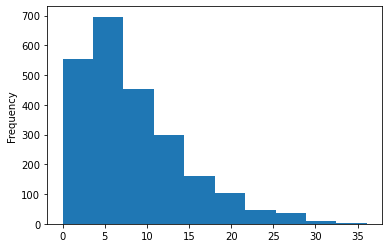

In [6]:
# Points Histogram
# Right skew here with majority of players scoring around 5 points per game
PTS_column.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

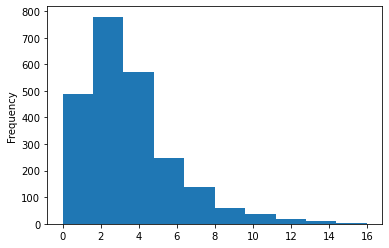

In [7]:
# Rebounds Histogram
# Right skew here with majority of players getting between 2-4 rebounds a game

TRB_column.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

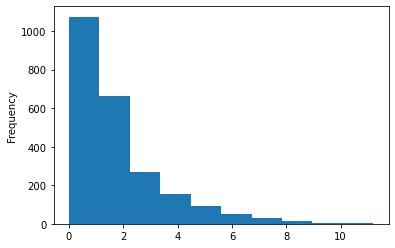

In [8]:
# Assists Histogram
# Right skew here with majority of players getting between 0-2 assists a game

AST_column.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

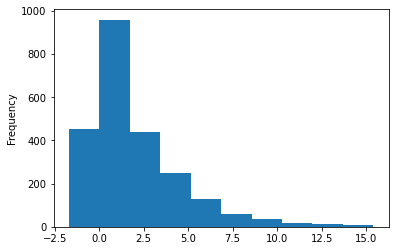

In [9]:
# Win shares Histogram
WS_Column.plot(kind="hist")

<AxesSubplot:xlabel='Player'>

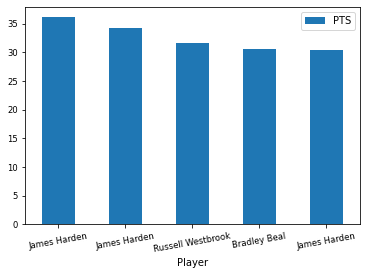

In [10]:
#Players with highest points per game seasons between 2016-2019

#James Harden
#James Harden
#Russell Westbrook
#Bradley Beal
#James Harden

top_5 = df.sort_values(by="PTS", ascending=False).head()

top_5.plot(x="Player", y="PTS", kind="bar", rot=10, fontsize=8.5)

<AxesSubplot:xlabel='Player'>

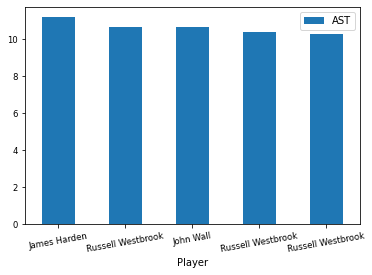

In [11]:
#Players with highest assists per game seasons between 2016-2019

#James Harden
#Russell Westbrook
#John Wall
#Russell Westbrook
#Russell Westbrook

top_5ast = df.sort_values(by="AST", ascending=False).head()

top_5ast.plot(x="Player", y="AST", kind="bar", rot=10, fontsize=8.5)

<AxesSubplot:xlabel='Player'>

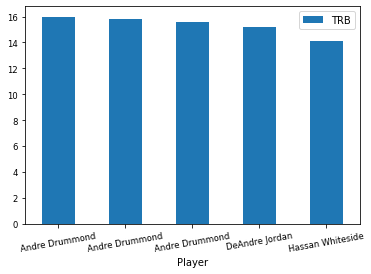

In [12]:
#Players with highest rebounds per game seasons between 2016-2019

#Andre Drummond
#Andre Drummond
#Andre Drummond
#DeAndre Jordann
#Hassan Whiteside

top_5reb = df.sort_values(by="TRB", ascending=False).head()

top_5reb.plot(x="Player", y="TRB", kind="bar", rot=10, fontsize=8.5)

<AxesSubplot:xlabel='Player'>

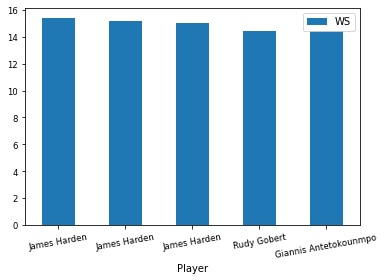

In [13]:
#Players with highest win shares between 2016-2019

#James Harden
#James Harden
#James Harden
#Rudy Gobert
#Giannis Antetokounmpo

top_5W = df.sort_values(by="WS", ascending=False).head()

top_5W.plot(x="Player", y="WS", kind="bar", rot=10, fontsize=8.5)

<AxesSubplot:xlabel='USG%', ylabel='PTS'>

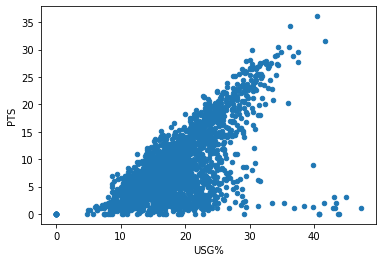

In [14]:
#Correlation between usage rate and points scored
#Fairly strong correlation

df.plot(x="USG%", y="PTS", kind="scatter")

<AxesSubplot:xlabel='3PA', ylabel='PTS'>

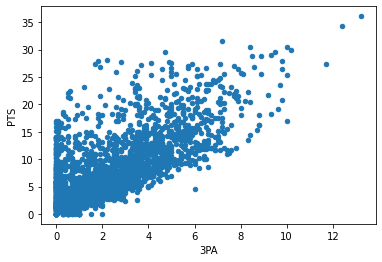

In [15]:
#Correlation between 3 points attempted per game and points scored
#Stronger correlation than usage rate

df.plot(x="3PA", y="PTS", kind="scatter")

<AxesSubplot:xlabel='3P', ylabel='PTS'>

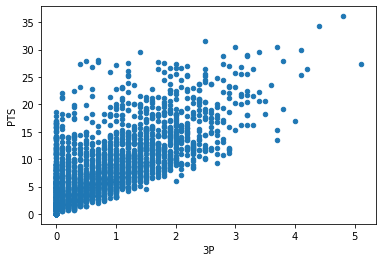

In [16]:
#Correlation between 3 points made and points scored
#Strong correlation

df.plot(x="3P", y="PTS", kind="scatter")

<AxesSubplot:xlabel='WS', ylabel='PTS'>

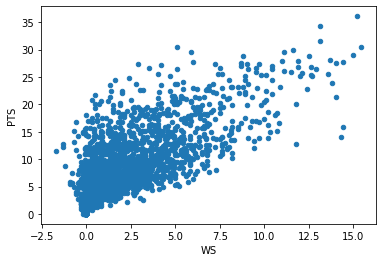

In [17]:
#Correlation between win shares and points scored
#Strong correlation

df.plot(x="WS", y="PTS", kind="scatter")

# Replace null/blank values with 0

In [18]:
df.fillna(0, inplace=True)

# Putting all the predictive features in a list (xcols)

In [19]:
xcols = df.columns[7 : 35].to_list()
print(xcols,'\n')

['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', 'USG%', 'WS', 'BPM'] 



# Train-test split

## Split the data into training (80%) and testing (20%) portions

#### Notes: train_test_split shuffles the data prior to splitting, so should be randomized
#### The 'random_state' feature ensures that you get the same split of the data every time

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df[xcols], df['All-Star'], 
                                                    train_size=0.8, random_state=1)
print('training data:', X_train.shape)
print('test data:', X_test.shape)

training data: (1888, 28)
test data: (472, 28)


# Logistic regression part 1 using all of the data

In [21]:
#Pretty good accuracy although there is a slight indication of overfitting

log_reg = LogisticRegression(solver='lbfgs', max_iter=3000)

# Fit the model to the training data
clf = log_reg.fit(X_train, y_train)

# Get accuracy stats
print('training accuracy: {}'.format(clf.score(X_train, y_train).round(3)))
print('test accuracy: {}'.format(clf.score(X_test, y_test).round(3)))

training accuracy: 0.98
test accuracy: 0.987


# Exploring the coefficients

In [22]:
# Put the coefficients into a new dataframe
coef = pd.concat([pd.DataFrame(xcols),pd.DataFrame(np.transpose(clf.coef_))], axis = 1)
coef.columns = ['feature','coefficient']
coef.sort_values(by=['coefficient'], ascending=False, inplace=True)

# Examine the features/stats with the 10 largest positive and negative coefficients
print('Ten largest positive features:\n', coef.head(10), '\n')
print('Ten largest negative features:\n', coef.tail(10))

#The coefficients here show the best weights to maximize the 1s and minimize the 0s.

Ten largest positive features:
    feature  coefficient
19     BLK     0.896932
15     DRB     0.699265
26      WS     0.576855
18     STL     0.502342
17     AST     0.324525
25    USG%     0.310784
4       3P     0.305152
6      3P%     0.257870
0       MP     0.205625
8      2PA     0.168880 

Ten largest negative features:
    feature  coefficient
20     TOV     0.035314
16     TRB     0.024485
2      FGA     0.018399
12     FTA    -0.077998
11      FT    -0.143209
5      3PA    -0.170199
23     PER    -0.272222
21      PF    -0.441302
7       2P    -0.538853
14     ORB    -0.692044


In [23]:
#Adding the features with the 10 largest positive and negative coefficients to a new list for training purposes

xcols2 = coef.feature[0:10].to_list()
xcols2 += coef.feature[-10:].to_list()
print(xcols2)

['BLK', 'DRB', 'WS', 'STL', 'AST', 'USG%', '3P', '3P%', 'MP', '2PA', 'TOV', 'TRB', 'FGA', 'FTA', 'FT', '3PA', 'PER', 'PF', '2P', 'ORB']


# Logistic regression part 2 using only the list of features with the largest coefficients (xcols2)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df[xcols2], df['All-Star'], 
                                                    train_size=0.8, random_state=1)
print('training data:', X_train.shape)
print('test data:', X_test.shape)

# fit the model to the training data
clf2 = log_reg.fit(X_train, y_train)

# get accuracy stats
print('training accuracy: {}'.format(clf2.score(X_train, y_train).round(3)))
print('test accuracy: {}'.format(clf2.score(X_test, y_test).round(3)))

training data: (1888, 20)
test data: (472, 20)
training accuracy: 0.979
test accuracy: 0.987


# Model Evaluation

In [25]:
# Regularization w/ logistic regression & C parameter with logistic regression

cset = [.001, .01, .1, 1, 10]
for i in cset:
    print('C =', i)
    log_reg = LogisticRegression(solver='lbfgs', max_iter=3000, C=i)
    clf = log_reg.fit(X_train, y_train)
    print('training accuracy: {}'.format(clf.score(X_train, y_train).round(3)))
    print('test accuracy: {}'.format(clf.score(X_test, y_test).round(3)), '\n')

C = 0.001
training accuracy: 0.976
test accuracy: 0.985 

C = 0.01
training accuracy: 0.978
test accuracy: 0.987 

C = 0.1
training accuracy: 0.977
test accuracy: 0.989 

C = 1
training accuracy: 0.979
test accuracy: 0.987 

C = 10
training accuracy: 0.98
test accuracy: 0.985 



In [26]:
# Cross-validation w/ tuning regularization in logistic regression

for i in cset:
    print('C =', i)
    log_reg = LogisticRegression(solver='lbfgs', max_iter=3000, C=i)
    scores = cross_val_score(log_reg, df[xcols2], df['All-Star'], cv=5)
    print(scores)
    print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2), '\n')

C = 0.001
[0.98305085 0.97669492 0.97881356 0.97881356 0.96822034]
Accuracy: 0.977 (+/- 0.010) 

C = 0.01
[0.97669492 0.98305085 0.97457627 0.98305085 0.97245763]
Accuracy: 0.978 (+/- 0.009) 

C = 0.1
[0.97669492 0.9809322  0.97457627 0.9809322  0.97669492]
Accuracy: 0.978 (+/- 0.005) 

C = 1
[0.97669492 0.97245763 0.97457627 0.9809322  0.97245763]
Accuracy: 0.975 (+/- 0.006) 

C = 10
[0.97245763 0.97457627 0.97457627 0.9809322  0.96610169]
Accuracy: 0.974 (+/- 0.010) 



In [27]:
# Let's check out some other stats for the test data
# Pretty good recall, precision, F1 score and specificity overall

y_pred_test = clf.predict(X_test)
print('  Recall: {:.3f}'.format(recall_score(y_test, y_pred_test)))
print('  Precision: {:.3f}'.format(precision_score(y_test, y_pred_test)))
print('  F1 score: {:.3f}'.format(f1_score(y_test, y_pred_test)))
cm = confusion_matrix(y_test, y_pred_test)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)
print('  Specificity: {:.3f}'.format(specificity))

  Recall: 0.800
  Precision: 0.842
  F1 score: 0.821
  Specificity: 0.993


In [28]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred_test)
sample = np.array([['TN', 'FP'], ['FN', 'TP']])
print('CM key:\n', sample, '\n')
print('CM for test:\n', cm)

CM key:
 [['TN' 'FP']
 ['FN' 'TP']] 

CM for test:
 [[449   3]
 [  4  16]]


# Implementing Grid search attempting to to compute the optimum values of hyperparameters

In [29]:
# Grid search

# Define x_scaler

scaler = MinMaxScaler()

X = df[xcols2]
scaled_X = scaler.fit_transform(X)
y = df['All-Star']

In [30]:
# Grid search

# Positive results

scaled_X = scaler.fit_transform(X_train)

tuned_parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}

grid = GridSearchCV(LogisticRegression(solver='liblinear'), tuned_parameters, cv=3, scoring="accuracy")

grid.fit(scaled_X, y_train)

print('mean of accuracies:', grid.cv_results_['mean_test_score'])
print('std dev of accuracies:', grid.cv_results_['std_test_score'])

# print best parameter after tuning 
print('best parameters:', grid.best_params_) 

# store the best estimator (In this case it's 'C': 100)
best_logreg = grid.best_estimator_

mean of accuracies: [0.95815732 0.97192823 0.97404463 0.97404463 0.97404463 0.97510283
 0.97616272]
std dev of accuracies: [0.0014831  0.00197893 0.00328017 0.0052545  0.00418325 0.00457164
 0.00390663]
best parameters: {'C': 100}


# Ensemble Model: Random Forests

In [31]:
#Bagging with random forests

# set-up grid of parameters to search
param_grid = {'n_estimators': [10, 100, 250], 'max_samples': [.25, .5, 1]} 


# instantiate grid search object
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 3)

# fitting the model for grid search 
grid.fit(X, y)

# print parameters, mean, and standard deviation of scores by iteration
for z in range(0, len(grid.cv_results_['params'])):
    print('\nparams:', grid.cv_results_['params'][z])
    print('mean of accuracies:', grid.cv_results_['mean_test_score'][z])
    print('std dev of accuracies:', grid.cv_results_['std_test_score'][z])

# print best parameter after tuning 
print('\n***best parameters:', grid.best_params_)
print('best score:', grid.best_score_)

# store the best estimator (in this case it's 'max_samples': 0.5, 'n_estimators': 100)
best_rf = grid.best_estimator_


params: {'max_samples': 0.25, 'n_estimators': 10}
mean of accuracies: 0.9783876672777417
std dev of accuracies: 0.004163786241168384

params: {'max_samples': 0.25, 'n_estimators': 100}
mean of accuracies: 0.978810677754391
std dev of accuracies: 0.004919325353848497

params: {'max_samples': 0.25, 'n_estimators': 250}
mean of accuracies: 0.980504875128385
std dev of accuracies: 0.006095597012227296

params: {'max_samples': 0.5, 'n_estimators': 10}
mean of accuracies: 0.9771154026466985
std dev of accuracies: 0.0055077881963055434

params: {'max_samples': 0.5, 'n_estimators': 100}
mean of accuracies: 0.9792347659647387
std dev of accuracies: 0.004208928110305293

params: {'max_samples': 0.5, 'n_estimators': 250}
mean of accuracies: 0.9796583153082373
std dev of accuracies: 0.004538167749342911

params: {'max_samples': 1, 'n_estimators': 10}
mean of accuracies: 0.9563560961467786
std dev of accuracies: 0.0005864634258649128

params: {'max_samples': 1, 'n_estimators': 100}
mean of accurac

# Let's Start Predicting (Using the Logistic Regression Model due to it having slightly more accuracy)

In [32]:
#Bringing in new data for this past season (2020-2021)
#Cheers to Basketball Reference for having the data, just needed to combine them

mydata = pd.read_csv('2020_2021_season.csv')
print(mydata.shape, mydata.columns.to_list(),'\n')
mydata

(626, 35) ['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', 'USG%', 'WS', 'BPM'] 



,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,USG%,WS,BPM
0,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,0.544,0.0,0.0,0.000,2.0,3.7,0.546,0.544,0.9,1.8,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,14.2,0.550,19.5,1.3,-4.5
1,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,0.125,0.0,0.3,0.000,0.1,0.9,0.167,0.125,0.0,0.0,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,-6.5,0.125,18.6,-0.1,-19.8
2,3,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,0.614,0.0,0.1,0.000,3.3,5.3,0.620,0.614,1.0,2.3,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,15.1,0.596,11.7,4.0,-0.8
3,4,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,0.570,0.0,0.1,0.250,7.1,12.4,0.573,0.571,4.4,5.5,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,22.7,0.626,23.7,8.8,4.7
4,5,LaMarcus Aldridge,C,35,SAS,21,18,25.9,5.5,11.8,0.464,1.3,3.6,0.360,4.2,8.2,0.509,0.518,1.5,1.8,0.838,0.8,3.7,4.5,1.7,0.4,0.9,1.0,1.7,13.7,15.1,0.545,22.7,0.8,-1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,0.462,1.2,3.1,0.398,2.6,5.3,0.500,0.536,1.1,1.3,0.833,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,15.9,0.563,17.1,1.3,0.8
622,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,0.559,0.2,0.7,0.267,5.3,9.1,0.580,0.568,1.0,1.7,0.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,20.3,0.578,22.3,5.1,3.2
623,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,0.438,2.2,6.3,0.343,5.6,11.3,0.491,0.499,7.7,8.7,0.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,23.0,0.589,33.0,7.2,3.6
624,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,0.559,0.1,0.6,0.143,3.7,6.2,0.598,0.565,1.8,2.5,0.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,18.2,0.599,18.3,3.3,-0.3


# Once again, replace null/blank values with 0

In [33]:
mydata.fillna(0, inplace=True)

# Creating a dataset with only the 10 negative/positive features that we discovered earlier

In [34]:
mydata2 = mydata[['BLK', 'DRB', 'WS', 'STL', 'AST', 'USG%', '3P', '3P%', 'MP', '2PA', 'TOV', 'TRB', 'FGA', 'FTA', 'FT', '3PA', 'PER', 'PF', '2P', 'ORB']]

In [35]:
mydata2

,BLK,DRB,WS,STL,AST,USG%,3P,3P%,MP,2PA,TOV,TRB,FGA,FTA,FT,3PA,PER,PF,2P,ORB
0,0.5,2.2,1.3,0.3,0.5,19.5,0.0,0.000,12.1,3.7,0.7,3.4,3.7,1.8,0.9,0.0,14.2,1.5,2.0,1.2
1,0.0,0.4,-0.1,0.0,0.3,18.6,0.0,0.000,2.6,0.9,0.0,0.4,1.1,0.0,0.0,0.3,-6.5,0.1,0.1,0.0
2,0.7,5.2,4.0,0.9,1.9,11.7,0.0,0.000,27.7,5.3,1.3,8.9,5.3,2.3,1.0,0.1,15.1,1.9,3.3,3.7
3,1.0,6.7,8.8,1.2,5.4,23.7,0.0,0.250,33.5,12.4,2.6,9.0,12.5,5.5,4.4,0.1,22.7,2.3,7.1,2.2
4,0.9,3.7,0.8,0.4,1.7,22.7,1.3,0.360,25.9,8.2,1.0,4.5,11.8,1.8,1.5,3.6,15.1,1.7,4.2,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,0.4,2.9,1.3,1.6,3.6,17.1,1.2,0.398,25.8,5.3,1.3,3.9,8.3,1.3,1.1,3.1,15.9,1.1,2.6,1.0
622,0.6,3.8,5.1,1.1,4.3,22.3,0.2,0.267,24.3,9.1,2.0,6.2,9.7,1.7,1.0,0.7,20.3,2.2,5.3,2.5
623,0.2,3.3,7.2,0.8,9.4,33.0,2.2,0.343,33.7,11.3,4.1,3.9,17.7,8.7,7.7,6.3,23.0,1.8,5.6,0.6
624,0.4,4.4,3.3,0.6,1.8,18.3,0.1,0.143,20.9,6.2,1.1,6.8,6.8,2.5,1.8,0.6,18.2,2.5,3.7,2.5


In [36]:
xcols3 = mydata2.columns.to_list()
print(xcols3,'\n')

['BLK', 'DRB', 'WS', 'STL', 'AST', 'USG%', '3P', '3P%', 'MP', '2PA', 'TOV', 'TRB', 'FGA', 'FTA', 'FT', '3PA', 'PER', 'PF', '2P', 'ORB'] 



# Predicting the 2020-2021 all-stars with the data

In [37]:
pred = clf.predict(mydata[xcols3])

In [38]:
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 

# Adding the All-Star information back to the dataset

In [39]:
mydata['All-Star'] = pred.tolist()

In [40]:
print(mydata)

      Rk             Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  \
0      1   Precious Achiuwa  PF   21  MIA  61   4  12.1  2.0   3.7  0.544   
1      2       Jaylen Adams  PG   24  MIL   7   0   2.6  0.1   1.1  0.125   
2      3       Steven Adams   C   27  NOP  58  58  27.7  3.3   5.3  0.614   
3      4        Bam Adebayo   C   23  MIA  64  64  33.5  7.1  12.5  0.570   
4      5  LaMarcus Aldridge   C   35  SAS  21  18  25.9  5.5  11.8  0.464   
..   ...                ...  ..  ...  ...  ..  ..   ...  ...   ...    ...   
621  536       Delon Wright  PG   28  SAC  27   8  25.8  3.9   8.3  0.462   
622  537     Thaddeus Young  PF   32  CHI  68  23  24.3  5.4   9.7  0.559   
623  538         Trae Young  PG   22  ATL  63  63  33.7  7.7  17.7  0.438   
624  539        Cody Zeller   C   28  CHO  48  21  20.9  3.8   6.8  0.559   
625  540        Ivica Zubac   C   23  LAC  72  33  22.3  3.6   5.5  0.652   

      3P  3PA    3P%   2P   2PA    2P%   eFG%   FT  FTA    FT%  ORB  DRB  T

In [42]:
#Storing the results

mydata.to_csv(r'/Users/tricky/Desktop/Predicting NBA All-Stars project/Data/2020_season_all_stars.csv')

# Final Results

## 2020 All-Stars from my model:
#### Giannis Antetokounmpo
#### Stephen Curry
#### Luka Doncic
#### Kevin Durant
#### Joel Embiid
#### Paul George
#### James Harden
#### Kyrie Irving
#### LeBron James
#### Nikola Jokic
#### Zach LaVine
#### Kawhi Leonard
#### Damian Lillard
#### Donovan Mitchell
#### Chris Paul
#### Julius Randle
#### Domantas Sabonis
#### Jayson Tatum
#### Nikola Vucevic
#### Russell Westbrook
#### Trae Young

## 2020 All-Stars in reality:
#### Giannis Antetokounmpo
#### Stephen Curry
#### Luka Doncic
#### Kevin Durant
#### Joel Embiid
#### Paul George
#### James Harden
#### Kyrie Irving
#### LeBron James
#### Nikola Jokic
#### Zach LaVine
#### Kawhi Leonard
#### Damian Lillard
#### Donovan Mitchell
#### Chris Paul
#### Julius Randle
#### Domantas Sabonis
#### Jayson Tatum
#### Nikola Vucevic
#### Jaylen Brown
#### Rudy Gobert
#### Ben Simmons
#### Bradley Beal
#### Mike Conley
#### Trae Young